In [1]:
import numpy as np # library to handle data in a vectorised manner
import pandas as pd # library for data analysis
import sklearn as sk # library for scikit

In [2]:
VC_df = pd.read_csv("D:\Kaggle Data Sets\Startup Investments\investments_VC.csv",encoding= 'unicode_escape')
VC_df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# remove startups with unknown statuses and market

VC_df.dropna(subset = ['status', ' market ', 'founded_month','founded_quarter'],inplace = True)

In [59]:
list(VC_df.columns.values)

['permalink',
 'name',
 'homepage_url',
 'category_list',
 ' market ',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'funding_rounds',
 'founded_at',
 'founded_month',
 'founded_quarter',
 'founded_year',
 'first_funding_at',
 'last_funding_at',
 'seed',
 'venture',
 'equity_crowdfunding',
 'undisclosed',
 'convertible_note',
 'debt_financing',
 'angel',
 'grant',
 'private_equity',
 'post_ipo_equity',
 'post_ipo_debt',
 'secondary_market',
 'product_crowdfunding',
 'round_A',
 'round_B',
 'round_C',
 'round_D',
 'round_E',
 'round_F',
 'round_G',
 'round_H',
 'Total Funding Raised USD']

In [5]:
# df_grpby_market = VC_df.groupby([' market ']).count()

In [6]:
# df_grpby_market

In [7]:
# find number of rounds for each start up

filter_col = [col for col in VC_df if col.startswith('round')]
filter_col

funding = VC_df[filter_col]

extended_col = ['seed','venture','equity_crowdfunding','undisclosed','convertible_note','debt_financing','angel','grant''grant','private_equity','post_ipo_equity','post_ipo_debt','secondary_market','product_crowdfunding']
funding[extended_col] = VC_df[['seed','venture','equity_crowdfunding','undisclosed','convertible_note','debt_financing','angel','grant','private_equity','post_ipo_equity','post_ipo_debt','secondary_market','product_crowdfunding']]

temp = funding.sum(axis = 1)

VC_df['Total Funding Raised USD'] = temp

VC_df.drop(columns = [' funding_total_usd '],inplace = True)

C:\Users\bongewj\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [74]:
market_onehot = pd.get_dummies(VC_df[' market '])
market_onehot.shape

(35763, 733)

In [75]:
status_onehot = pd.get_dummies(VC_df['status'])
status_onehot.shape

(35763, 3)

In [76]:
country_onehot = pd.get_dummies(VC_df['country_code'])
country_onehot.shape

(35763, 109)

In [77]:
first_funding_year = VC_df['first_funding_at'].str[:4].astype(int)
first_funding_year.shape

(35763,)

In [85]:
VC_df2 = VC_df.drop(['permalink','name','homepage_url','category_list',' market ','status','country_code','state_code','region','city','founded_at','founded_year','last_funding_at'],axis = 1)
VC_df2.shape

(35763, 26)

In [86]:
VC_df2 = pd.concat([VC_df2,first_funding_year,market_onehot,status_onehot,country_onehot], axis = 1)

In [87]:
msk = np.random.rand(len(VC_df)) < 0.8

train = VC_df2[msk]
test = VC_df2[~msk]

In [88]:
corrMatrix = train.corr()

KeyboardInterrupt: 

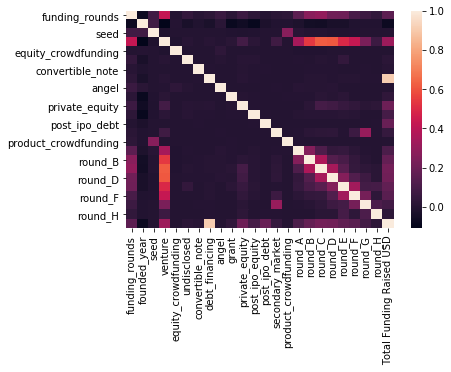

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=False)
plt.show()

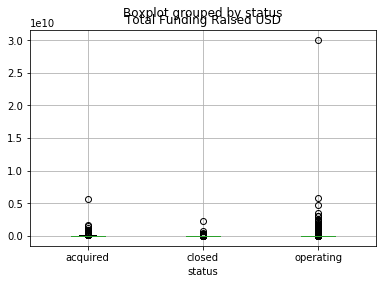

In [22]:
#VC_df.boxplot(column = ['Total Funding Raised USD'],by = 'status')

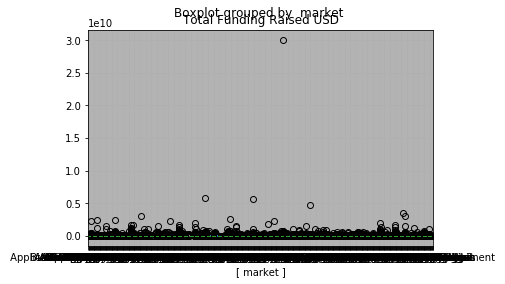

In [12]:
#VC_df.boxplot(column = ['Total Funding Raised USD'], by = [' market '])

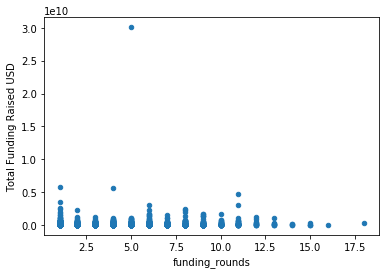

In [41]:
#VC_df.plot.scatter('funding_rounds','Total Funding Raised USD')

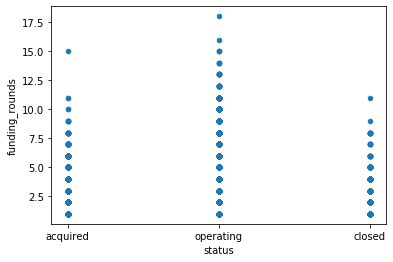

In [43]:
#VC_df.plot.scatter('status','funding_rounds')